In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
color_dict = {
    1: 'darkorange',
    2: 'mediumturquoise',
    3: 'darkorchid',
    4: 'cornflowerblue',
    5: 'firebrick',
    6: 'mediumseagreen'
}

In [115]:
# variable naming scheme:
#   mi_tj_ck = data for machine i in trial j which had clock speed k
# Basic parameter trials
# Trial 1
m0_t1_c2 = pd.read_csv('./Trial1/machine0clock_speed2log.csv')
m1_t1_c4 = pd.read_csv('./Trial1/machine1clock_speed4log.csv')
m2_t1_c5 = pd.read_csv('./Trial1/machine2clock_speed5log.csv')

# Trial 2
m0_t2_c2 = pd.read_csv('./Trial2/machine0clock_speed2log.csv')
m1_t2_c6 = pd.read_csv('./Trial2/machine1clock_speed6log.csv')
m2_t2_c2 = pd.read_csv('./Trial2/machine2clock_speed2log.csv')

# Trial 3
m0_t3_c4 = pd.read_csv('./Trial3/machine0clock_speed4log.csv')
m1_t3_c5 = pd.read_csv('./Trial3/machine1clock_speed5log.csv')
m2_t3_c5 = pd.read_csv('./Trial3/machine2clock_speed5log.csv')

# Trial 4
m0_t4_c6 = pd.read_csv('./Trial4/machine0clock_speed6log.csv')
m1_t4_c5 = pd.read_csv('./Trial4/machine1clock_speed5log.csv')
m2_t4_c4 = pd.read_csv('./Trial4/machine2clock_speed4log.csv')

# Trial 5
m0_t5_c1 = pd.read_csv('./Trial5/machine0clock_speed1log.csv')
m1_t5_c6 = pd.read_csv('./Trial5/machine1clock_speed6log.csv')
m2_t5_c1 = pd.read_csv('./Trial5/machine2clock_speed1log.csv')

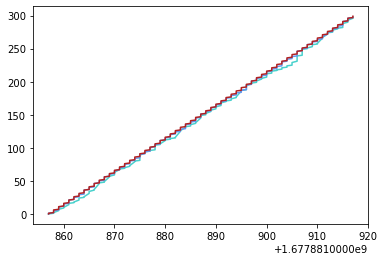

In [116]:
plt.plot(m0_t1_c2['system_time'], m0_t1_c2['logical_clock_time'], c=color_dict[2])
plt.plot(m1_t1_c4['system_time'], m1_t1_c4['logical_clock_time'], c=color_dict[4])
plt.plot(m2_t1_c5['system_time'], m2_t1_c5['logical_clock_time'], c=color_dict[5])

In [117]:
def plotQueueLengths(trial_df0, trial_df1, trial_df2, speed0, speed1, speed2, trial_num):
    plt.figure(figsize=(10,5))
    plt.title("Queue Lengths per Thread in Trial " + str(trial_num))
    plt.xlabel("System Time (unix timestamp)")
    plt.ylabel("Queue Length (messages)")
    plt.yticks(np.arange(0, 1.5*max(max(trial_df0['length_of_queue']), max(trial_df1['length_of_queue']), max(trial_df2['length_of_queue'])), step=1))
    plt.plot(trial_df0['system_time'], trial_df0['length_of_queue'], 'o-', label=f'Machine 0, Clock Speed {speed0}', c=color_dict[2], alpha=0.3)
    plt.plot(trial_df1['system_time'], trial_df1['length_of_queue'], '^-', label=f'Machine 1, Clock Speed {speed1}', c=color_dict[4], alpha=0.3)
    plt.plot(trial_df2['system_time'], trial_df2['length_of_queue'], 'v-', label=f'Machine 2, Clock Speed {speed2}', c=color_dict[5], alpha=0.3)
    plt.legend(loc='upper left')

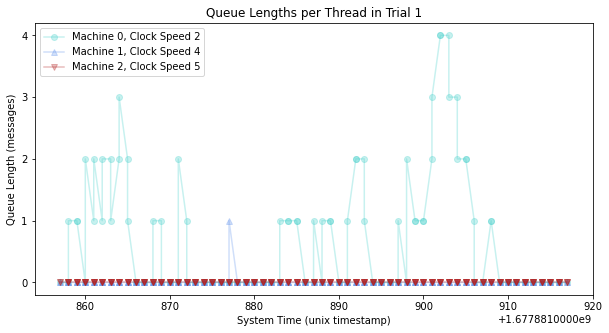

In [118]:

plotQueueLengths(m0_t1_c2, m1_t1_c4, m2_t1_c5, 2, 4, 5, 1)

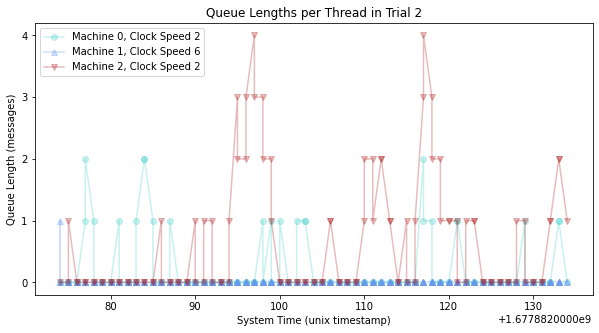

In [119]:
plotQueueLengths(m0_t2_c2, m1_t2_c6, m2_t2_c2, 2, 6, 2, 2)


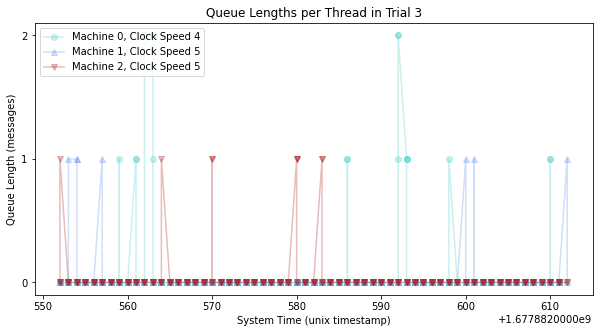

In [120]:
plotQueueLengths(m0_t3_c4, m1_t3_c5, m2_t3_c5, 4, 5, 5, 3)


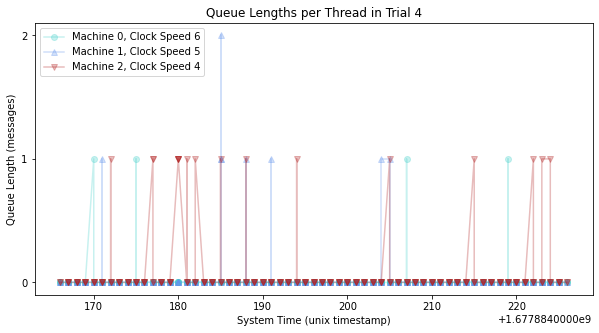

In [121]:
plotQueueLengths(m0_t4_c6, m1_t4_c5, m2_t4_c4, 6, 5, 4, 4)


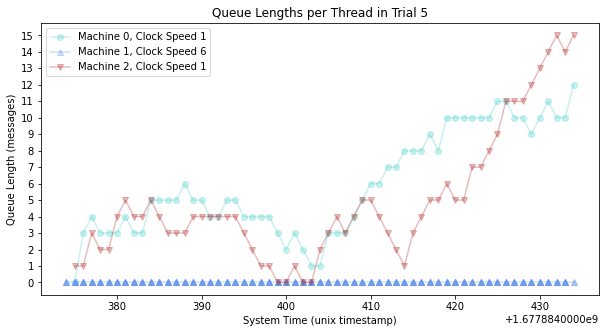

In [122]:
plotQueueLengths(m0_t5_c1, m1_t5_c6, m2_t5_c1, 1, 6, 1, 5)

In [126]:
# Higher probability of send trials
# Trial 1
hp_m0_t1_c2 = pd.read_csv('./higherSendProbabilityTrials/Trial1/machine0clock_speed2log.csv')
hp_m1_t1_c4 = pd.read_csv('./higherSendProbabilityTrials/Trial1/machine1clock_speed4log.csv')
hp_m2_t1_c3 = pd.read_csv('./higherSendProbabilityTrials/Trial1/machine2clock_speed3log.csv')

# Trial 2
hp_m0_t2_c2 = pd.read_csv('./higherSendProbabilityTrials/Trial2/machine0clock_speed2log.csv')
hp_m1_t2_c3 = pd.read_csv('./higherSendProbabilityTrials/Trial2/machine1clock_speed3log.csv')
hp_m2_t2_c1 = pd.read_csv('./higherSendProbabilityTrials/Trial2/machine2clock_speed1log.csv')

# Trial 3
hp_m0_t3_c1 = pd.read_csv('./higherSendProbabilityTrials/Trial3/machine0clock_speed1log.csv')
hp_m1_t3_c1 = pd.read_csv('./higherSendProbabilityTrials/Trial3/machine1clock_speed1log.csv')
hp_m2_t3_c1 = pd.read_csv('./higherSendProbabilityTrials/Trial3/machine2clock_speed1log.csv')

# Trial 4
hp_m0_t4_c6 = pd.read_csv('./higherSendProbabilityTrials/Trial4/machine0clock_speed6log.csv')
hp_m1_t4_c5 = pd.read_csv('./higherSendProbabilityTrials/Trial4/machine1clock_speed5log.csv')
hp_m2_t4_c6 = pd.read_csv('./higherSendProbabilityTrials/Trial4/machine2clock_speed6log.csv')

# Trial 5
hp_m0_t5_c3 = pd.read_csv('./higherSendProbabilityTrials/Trial5/machine0clock_speed3log.csv')
hp_m1_t5_c4 = pd.read_csv('./higherSendProbabilityTrials/Trial5/machine1clock_speed4log.csv')
hp_m2_t5_c2 = pd.read_csv('./higherSendProbabilityTrials/Trial5/machine2clock_speed2log.csv')

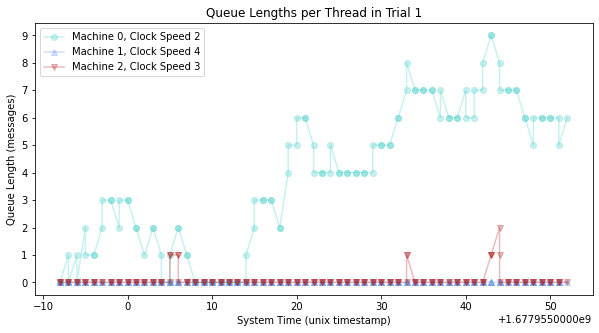

In [125]:
plotQueueLengths(hp_m0_t1_c2, hp_m1_t1_c4, hp_m2_t1_c3, 2, 4, 3, 1)

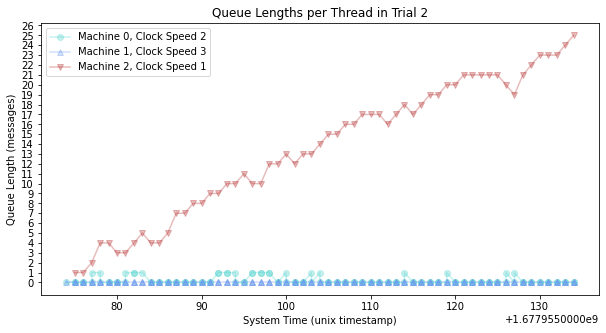

In [128]:
plotQueueLengths(hp_m0_t2_c2, hp_m1_t2_c3, hp_m2_t2_c1, 2, 3, 1, 2)

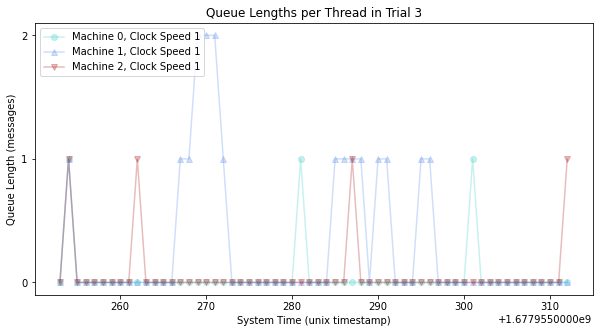

In [132]:
plotQueueLengths(hp_m0_t3_c1, hp_m1_t3_c1, hp_m2_t3_c1, 1, 1, 1, 3)

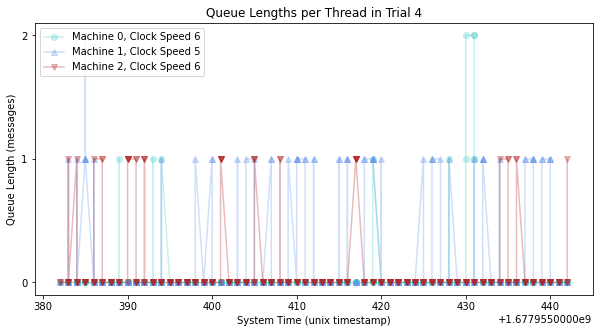

In [133]:
plotQueueLengths(hp_m0_t4_c6, hp_m1_t4_c5, hp_m2_t4_c6, 6, 5, 6, 4)

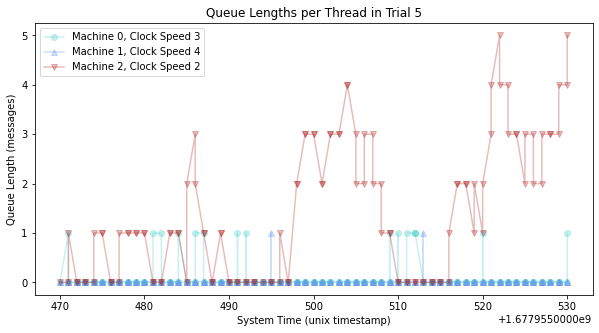

In [134]:
plotQueueLengths(hp_m0_t5_c3, hp_m1_t5_c4, hp_m2_t5_c2, 3, 4, 2, 5)